[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Lecture_Code/Code_10_1_Bayes_1.ipynb)

Need to install packages to get data and run Bayesian linear model

In [1]:
!pip install bambi
!pip install pydataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 899.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 24.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939414 sha256=989071463c00992bb28d4db4bf8ba4c6553760274d0f9582b891055f547ba439
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset


The pydatasets packages has many data sets you can use.

In [2]:
from pydataset import data
import pandas as pd
import numpy as np

# Quick exploration of data sets in pydatasets package
d = data()
d.iloc[20:30,:]




initiated datasets repo at: /root/.pydataset/


,dataset_id,title
20,USJudgeRatings,Lawyers' Ratings of State Judges in the US Superior Court
21,USPersonalExpenditure,Personal Expenditure Data
22,VADeaths,Death Rates in Virginia (1940)
23,WWWusage,Internet Usage per Minute
24,WorldPhones,The World's Telephones
25,airmiles,"Passenger Miles on Commercial US Airlines, 1937-1960"
26,airquality,New York Air Quality Measurements
27,anscombe,Anscombe's Quartet of 'Identical' Simple Linear Regressions
28,attenu,The Joyner-Boore Attenuation Data
29,attitude,The Chatterjee-Price Attitude Data


Load and view the Old Faithful data set

In [3]:

faithful = pd.DataFrame(data("faithful"))
faithful.head(10)


,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55
7,4.700,88
8,3.600,85
9,1.950,51
10,4.350,85


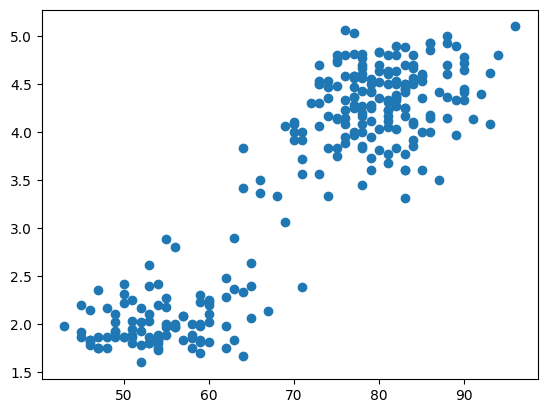

In [4]:
import matplotlib.pyplot as plt
plt.scatter(faithful.waiting,faithful.eruptions)

Run a Bayesian Linear model and visualize the output

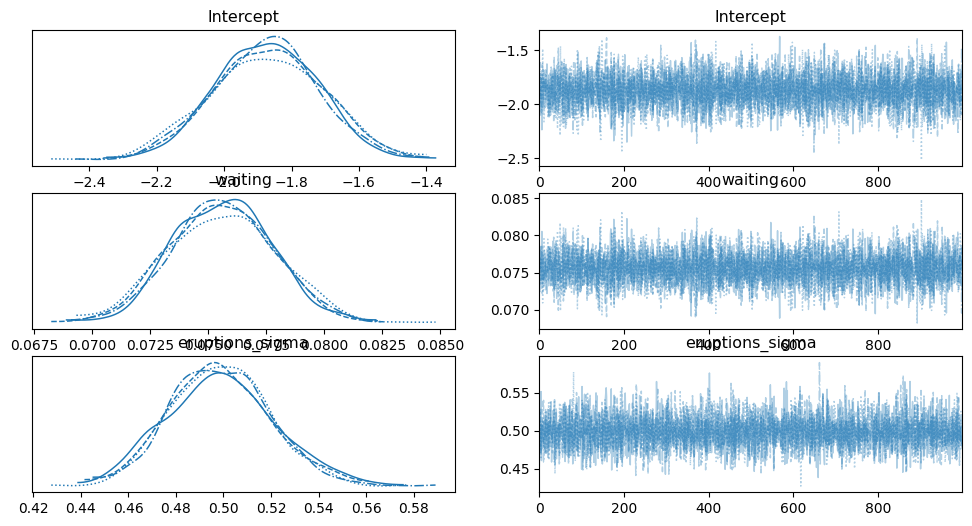

In [5]:
import bambi as bmb
import arviz as az

# Initialize a Bayesian linear model
model = bmb.Model("eruptions ~ waiting",faithful)

# Fit the model, do 4 different series of draws of length 1000
results = model.fit(draws=1000, chains=4)

# Plot the draws as a trace function and as a histogram of the draws
az.plot_trace(results)
plt.show()

In [6]:
az.summary(results)
# Mean of the posterior draws is called Bayes Estimate Under Squared Error Loss
# Median of the posterior draws is called Bayes estimate under absolute loss
# If someone says "Bayes Estimate" they imply the mean

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-1.872,0.160,-2.172,-1.574,0.002,0.001,6056.0,2595.0,1.0
waiting,0.076,0.002,0.072,0.080,0.000,0.000,6050.0,2953.0,1.0
eruptions_sigma,0.499,0.021,0.457,0.537,0.000,0.000,6604.0,3356.0,1.0


View the details of the model

In [7]:
model

       Formula: eruptions ~ waiting
        Family: gaussian
          Link: mu = identity
  Observations: 272
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 3.4878, sigma: 15.1506)
            waiting ~ Normal(mu: 0.0, sigma: 0.2099)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 1.1393)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

Check the model output for a linear model

In [8]:
# x must be in a certain format for the regression formulas
x = pd.DataFrame({"waiting":faithful.waiting})

# Import regression libraries
from sklearn.linear_model import LinearRegression

# Initialize a regression
reg_prep = LinearRegression()

# Fit the regression
mod_reg = reg_prep.fit(x,faithful.eruptions)

# Print the intercept
print('intercept:', mod_reg.intercept_)

# Print the Slope:
print('slope:', mod_reg.coef_)

intercept: -1.8740159864107366
slope: [0.07562795]


What happens if we change the priors? Imagine you go see an expert. They say "You know, the eruption probably lasts about 2 minutes long if there is a 45 minute break between eruptions but eruptions are
 almost 5 minutes long if it waits 90 minutes."

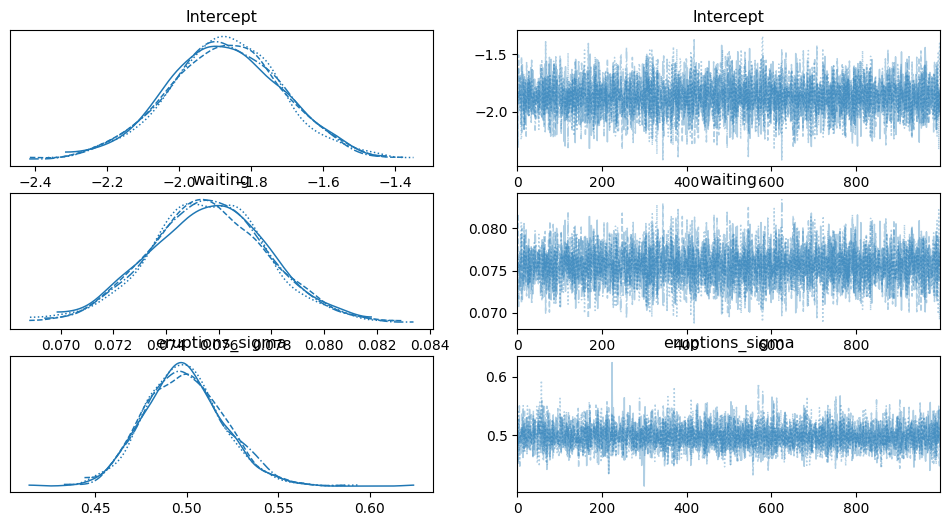

In [13]:
priors = {
"Intercept": bmb.Prior("Normal", mu=-1, sigma=5),
"waiting": bmb.Prior("Normal", mu=3/45, sigma=2/45)
}
model.set_priors(priors=priors)
# Fit the model, do 4 different series of draws of length 1000
results = model.fit(draws=1000, chains=4)

# Plot the draws as a trace function and as a histogram of the draws
az.plot_trace(results)
plt.show()

In [14]:
model

       Formula: eruptions ~ waiting
        Family: gaussian
          Link: mu = identity
  Observations: 272
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: -1.0, sigma: 5.0)
            waiting ~ Normal(mu: 0.0667, sigma: 0.0444)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 1.1393)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

In [15]:
az.summary(results)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-1.873,0.161,-2.167,-1.555,0.002,0.001,6333.0,3162.0,1.0
waiting,0.076,0.002,0.071,0.080,0.000,0.000,6386.0,2963.0,1.0
eruptions_sigma,0.498,0.021,0.458,0.537,0.000,0.000,6324.0,3276.0,1.0


Make probability statements about the unknown parameters. What is the probability that Beta_1 is negative? What is the probability Beta_1 is greater than 0.08?

In [19]:
# Creating a vector of the draws
posterior = results.posterior.stack({"draws":["chain","draw"]})
waiting_post = posterior["waiting"].values

# Probability of Beta_1 less than 0
print(sum(waiting_post < 0)/len(waiting_post))

# Probability of Beta_1 greater than 0.08
print(sum(waiting_post > .08)/len(waiting_post))

0.0
0.028


In [21]:
sum(waiting_post > 0.08)

112